Datasets : https://drive.google.com/drive/folders/15WZn-YqSRbEAMM3ErlDdm3zDu6m47tUb

In [1]:
import pandas as pd
import numpy as np 

In [2]:
#timestamp 
#DatetimeIndex
#date_range()
#to_datetime
pd.Timestamp("6-02-2023 9:30")

Timestamp('2023-06-02 09:30:00')

In [3]:
pd.Timestamp("6-02-2023 9:30").year

2023

In [4]:
pd.Timestamp("6-02-2023 9:30").month_name()

'June'

In [5]:
#DateTimeIndex :- collection of Datetime we can also make df and series index also 
pd.DatetimeIndex(["6-02-2023 9:30","08-02-2023 9:30"])

DatetimeIndex(['2023-06-02 09:30:00', '2023-08-02 09:30:00'], dtype='datetime64[ns]', freq=None)

In [6]:
pd.date_range(start='2022-02-11',end='2023-01-11',freq='M')

DatetimeIndex(['2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
#to_datetime()
s=pd.Series(['2023/1/6','2023/1/7','2023/1/8'])
s

0    2023/1/6
1    2023/1/7
2    2023/1/8
dtype: object

In [8]:
pd.to_datetime(s)

0   2023-01-06
1   2023-01-07
2   2023-01-08
dtype: datetime64[ns]

In [9]:
## Time Delta Object
#Represent  a duration , the difference between two dates or times 


In [10]:
#create using timestamp object
t1=pd.Timestamp('01-06-2023')
t2=pd.Timestamp('06-21-2023')

In [11]:
t1

Timestamp('2023-01-06 00:00:00')

In [12]:
t2

Timestamp('2023-06-21 00:00:00')

In [13]:
t2-t1

Timedelta('166 days 00:00:00')

In [14]:
#standalone creation 
pd.Timedelta(days=2,hours=10)

Timedelta('2 days 10:00:00')

In [15]:
#Arithmetic 
pd.Timestamp('31st Jan 2023') +pd.Timedelta(days=2,hours=10)

Timestamp('2023-02-02 10:00:00')

In [16]:
pd.date_range(start='31-01-2023',end='21-08-2023',freq='D') + pd.Timedelta(days=2,hours=12)

<ipython-input-16-5749ec709c50>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.date_range(start='31-01-2023',end='21-08-2023',freq='D') + pd.Timedelta(days=2,hours=12)


DatetimeIndex(['2023-02-02 12:00:00', '2023-02-03 12:00:00',
               '2023-02-04 12:00:00', '2023-02-05 12:00:00',
               '2023-02-06 12:00:00', '2023-02-07 12:00:00',
               '2023-02-08 12:00:00', '2023-02-09 12:00:00',
               '2023-02-10 12:00:00', '2023-02-11 12:00:00',
               ...
               '2023-08-14 12:00:00', '2023-08-15 12:00:00',
               '2023-08-16 12:00:00', '2023-08-17 12:00:00',
               '2023-08-18 12:00:00', '2023-08-19 12:00:00',
               '2023-08-20 12:00:00', '2023-08-21 12:00:00',
               '2023-08-22 12:00:00', '2023-08-23 12:00:00'],
              dtype='datetime64[ns]', length=203, freq='D')

In [18]:
df=pd.read_csv('/content/sample_data/deliveries (1).csv')
df

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98
...,...,...
496,6/24/91,2/2/96
497,9/9/91,3/30/98
498,11/16/90,4/27/98
499,6/3/93,6/13/93


In [19]:
#Average Deliery time 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [20]:
df['order_date']=pd.to_datetime(df['order_date'])

In [21]:
df['delivery_date']=pd.to_datetime(df['delivery_date'])

In [22]:
df

,order_date,delivery_date
0,1998-05-24,1999-02-05
1,1992-04-22,1998-03-06
2,1991-02-10,1992-08-26
3,1992-07-21,1997-11-20
4,1993-09-02,1998-06-10
...,...,...
496,1991-06-24,1996-02-02
497,1991-09-09,1998-03-30
498,1990-11-16,1998-04-27
499,1993-06-03,1993-06-13


In [23]:
#delivery Period
df['delivery_period']=df['delivery_date']-df['order_date']

In [25]:
df

,order_date,delivery_date,delivery_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days
...,...,...,...
496,1991-06-24,1996-02-02,1684 days
497,1991-09-09,1998-03-30,2394 days
498,1990-11-16,1998-04-27,2719 days
499,1993-06-03,1993-06-13,10 days


In [26]:
df['delivery_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

Time series
A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

Financial Data (Company stocks)
Natural Data (Rainfall measurement)
Event Data (Covid)
Medical Data (Heart rate monitoring)
Types of Operations done on Time Series

Time Series Analysis

Time Series Forecasting

In [27]:
# Time Series Data using Pandas 
google=pd.read_csv('/content/sample_data/google.csv')

In [28]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [29]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [30]:
google.shape

(4471, 7)

In [31]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [33]:
google['Date']=pd.to_datetime(google['Date'])

In [34]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [36]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [38]:
#Make Date column as index
google.set_index('Date',inplace=True)

In [39]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [40]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [41]:
#fetch specific date
google.loc['2004-08-19']

Open         4.981329e+01
High         5.183571e+01
Low          4.780083e+01
Close        4.998266e+01
Adj Close    4.998266e+01
Volume       4.487136e+07
Name: 2004-08-19 00:00:00, dtype: float64

In [43]:
#partial Indexing 2021 k 12th month k stocks k data  
google.loc['2021-12']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,2884.250000,2929.982910,2830.000000,2832.360107,2832.360107,1423800
2021-12-02,2836.479980,2893.500000,2819.639893,2875.530029,2875.530029,1062500
2021-12-03,2889.909912,2904.260010,2823.000000,2850.409912,2850.409912,1334400
2021-12-06,2871.479980,2887.030029,2812.939941,2875.929932,2875.929932,1109900
2021-12-07,2919.000000,2966.000000,2914.050049,2960.729980,2960.729980,1162900
2021-12-08,2966.629883,2983.129883,2944.000000,2974.409912,2974.409912,948200
2021-12-09,2963.520020,2992.100098,2950.580078,2962.120117,2962.120117,929000
2021-12-10,2982.000000,2988.000000,2947.149902,2973.500000,2973.500000,1081700
2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200


In [44]:
google.loc['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200
2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100


In [48]:
#create year and month name day_name
google['month_name']=google.index.month_name()

In [49]:
google['day_name']=google.index.day_name()

In [50]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday
...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday


In [52]:
#slicing on google dataset
#need range 
google.loc['2020-01-12':'2021-01-21']

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2020-01-13,1436.130005,1440.520020,1426.020020,1439.229980,1439.229980,1652300,January,Monday
2020-01-14,1439.010010,1441.800049,1428.369995,1430.880005,1430.880005,1558900,January,Tuesday
2020-01-15,1430.209961,1441.395020,1430.209961,1439.199951,1439.199951,1282700,January,Wednesday
2020-01-16,1447.439941,1451.989990,1440.920044,1451.699951,1451.699951,1173700,January,Thursday
2020-01-17,1462.910034,1481.295044,1458.219971,1480.390015,1480.390015,2396200,January,Friday
...,...,...,...,...,...,...,...,...
2021-01-14,1753.619995,1775.010010,1733.400024,1740.180054,1740.180054,1179500,January,Thursday
2021-01-15,1738.189941,1756.000000,1721.550049,1736.189941,1736.189941,1342200,January,Friday
2021-01-19,1752.250000,1809.275024,1741.459961,1790.859985,1790.859985,1734600,January,Tuesday


In [53]:
google.loc['2020-01-12':'2021-01-21':2]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2020-01-13,1436.130005,1440.520020,1426.020020,1439.229980,1439.229980,1652300,January,Monday
2020-01-15,1430.209961,1441.395020,1430.209961,1439.199951,1439.199951,1282700,January,Wednesday
2020-01-17,1462.910034,1481.295044,1458.219971,1480.390015,1480.390015,2396200,January,Friday
2020-01-22,1491.000000,1503.213989,1484.930054,1485.949951,1485.949951,1610800,January,Wednesday
2020-01-24,1493.589966,1495.494995,1465.250000,1466.709961,1466.709961,1784600,January,Friday
...,...,...,...,...,...,...,...,...
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600,January,Friday
2021-01-12,1753.920044,1778.040039,1725.310059,1746.550049,1746.550049,1357000,January,Tuesday
2021-01-14,1753.619995,1775.010010,1733.400024,1740.180054,1740.180054,1179500,January,Thursday


In [63]:
#Challenge - fetch info for a particular date every ye
pd.date_range(start='2004-04-01', end='2022-01-01',freq=pd.DateOffset(years=1))
google[google.index.isin(pd.date_range(start='2004-04-01', end='2022-01-01',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2005-04-01,90.540634,91.133408,89.658936,89.683846,89.683846,12410343,April,Friday
2008-04-01,223.034012,232.378983,222.600632,231.985458,231.985458,12231877,April,Tuesday
2009-04-01,171.248123,176.956726,169.669037,176.383865,176.383865,6627147,April,Wednesday
2010-04-01,284.608215,285.654297,281.719055,283.337982,283.337982,4221163,April,Thursday
2011-04-01,293.280701,296.483704,293.280701,294.795044,294.795044,5245990,April,Friday
2013-04-01,396.020630,399.627106,395.143890,399.099091,399.099091,3628148,April,Monday
2014-04-01,557.180237,566.893616,557.180237,565.607117,565.607117,7922,April,Tuesday
2015-04-01,547.097961,549.630981,538.022888,541.074463,541.074463,1963075,April,Wednesday
2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700,April,Friday


<Axes: xlabel='Date'>

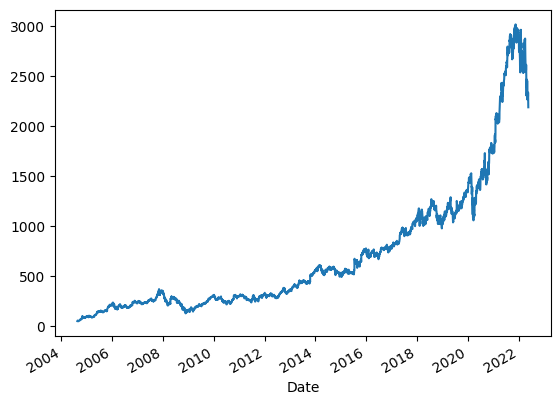

In [66]:
#viz a single col 
google['Close'].plot() 

In [67]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4471 entries, 2004-08-19 to 2022-05-20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4471 non-null   float64
 1   High        4471 non-null   float64
 2   Low         4471 non-null   float64
 3   Close       4471 non-null   float64
 4   Adj Close   4471 non-null   float64
 5   Volume      4471 non-null   int64  
 6   month_name  4471 non-null   object 
 7   day_name    4471 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 443.4+ KB


In [81]:
#viz all cols together 
df=google[['Open','High','Low',	'Close','Adj Close','Volume']]
ax=df.plot(subplots=True,
            layout=(2, 2),
            sharex=False,
            sharey=False,
            linewidth=0.7, 
            fontsize=10,
           legend=False,
            figsize=(20,15),
            title=['Open','High','Low',	'Close','Adj Close','Volume'])

ValueError: ignored

<Figure size 2000x1500 with 0 Axes>

<Axes: xlabel='Date'>

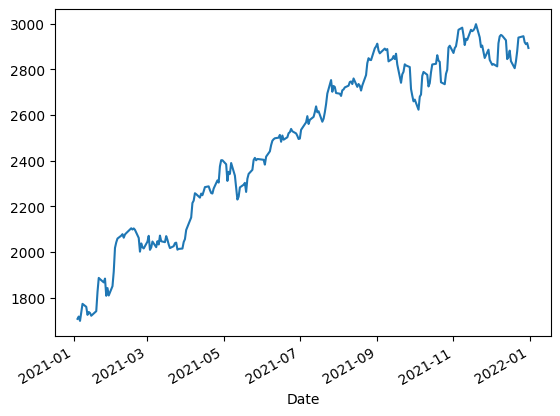

In [83]:
google.loc['2021']['Low'].plot()

<Axes: xlabel='Date'>

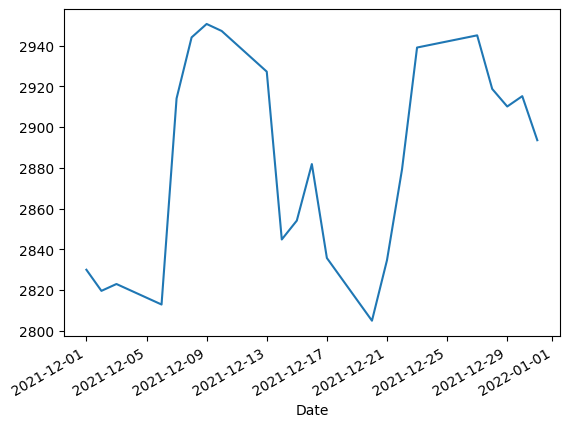

In [84]:
#monthly Trend 
google.loc['2021-12']['Low'].plot()

<Axes: xlabel='Date'>

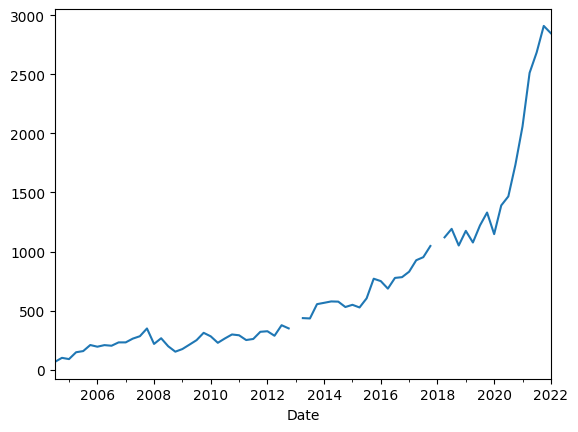

In [99]:
#quaterly Tregoogle

google['Open'].asfreq('Q',method='ffill').plot()

In [88]:
#frequency 
google.asfreq('D')#included saturday sunday so it will fill nan values 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday
...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday


In [91]:
google=google.asfreq('B')#Business Days 


In [92]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [93]:
#quaterly Data 
google.asfreq('Q')

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,Thursday
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,Thursday
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,Friday
...,...,...,...,...,...,...,...,...
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,2068.629883,1459900.0,March,Wednesday
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,Wednesday
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,Thursday


In [96]:
google.asfreq('6H',method='ffill')

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday
...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday


In [97]:
 google.asfreq('M',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252.0,August,Tuesday
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday
2004-10-31,96.413620,98.465927,95.277878,97.648987,97.648987,24541444.0,November,Monday
2004-11-30,90.017593,91.158318,89.788452,90.650223,90.650223,15457723.0,November,Tuesday
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday
...,...,...,...,...,...,...,...,...
2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864900.0,December,Friday
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800.0,January,Monday
2022-02-28,2665.689941,2712.810059,2656.504883,2697.820068,2697.820068,1483800.0,February,Monday


In [101]:
google['quarter']=google.index.quarter

In [102]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2


<Axes: xlabel='quarter'>

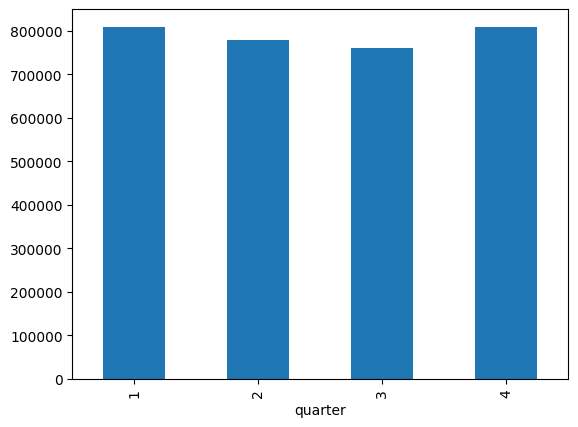

In [104]:
 google.groupby('quarter')['Close'].sum().plot(kind='bar')

In [106]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3


<Axes: xlabel='month_name'>

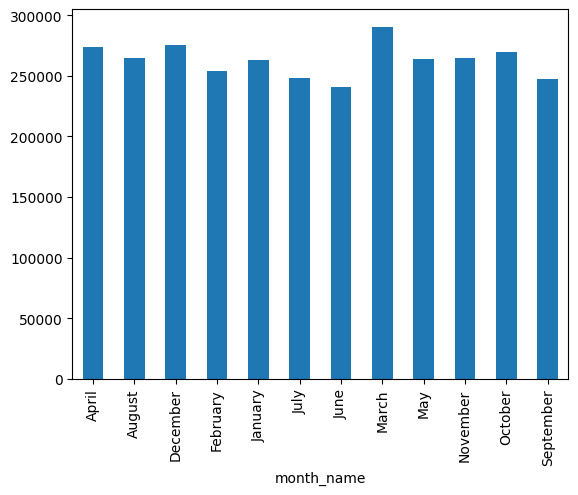

In [107]:
 google.groupby('month_name')['Close'].sum().plot(kind='bar')

In [ ]:
#Resampling 


Resampling
Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
Downsampling: Where you decrease the frequency of the samples, such as from days to months

<Axes: xlabel='Date'>

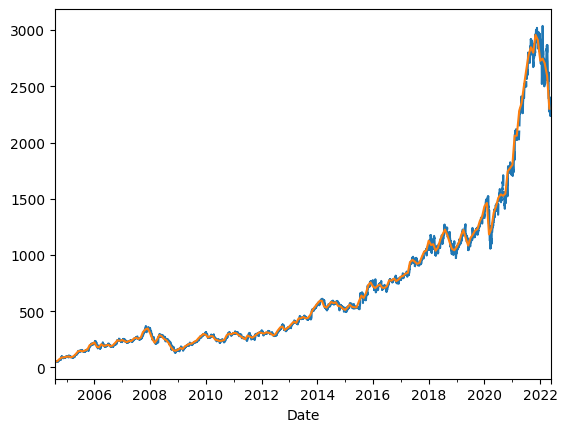

In [113]:
#downsampling 
google['Open'].plot()
google['Open'].resample('M').mean().plot()

<Axes: xlabel='Date'>

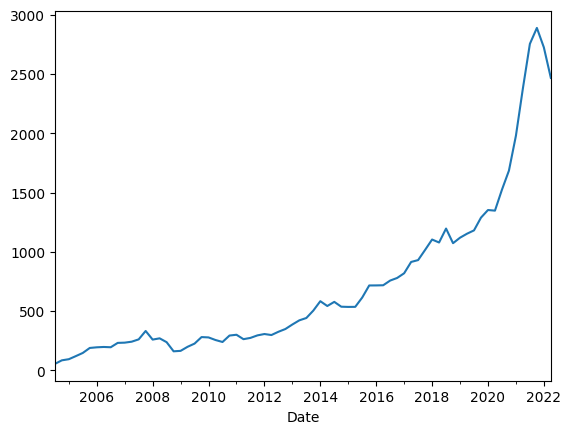

In [114]:
google['Open'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

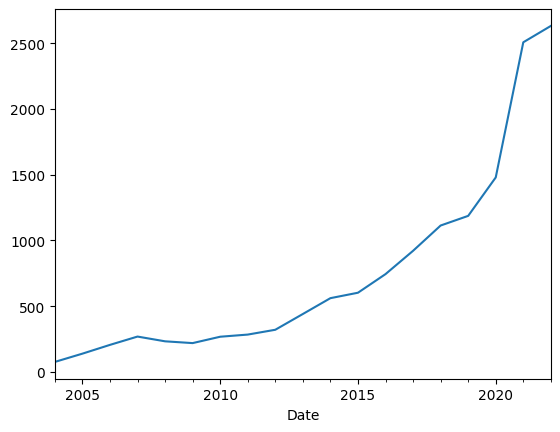

In [115]:
google['Open'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

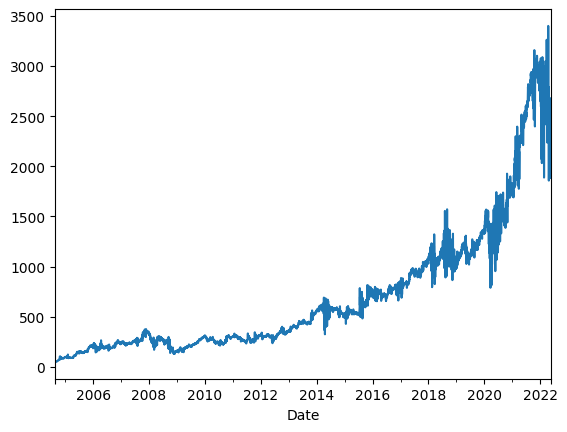

In [122]:
#upsampling 
google['Open'].resample('H').interpolate(method='spline',order=2).plot()

<Axes: xlabel='Date'>

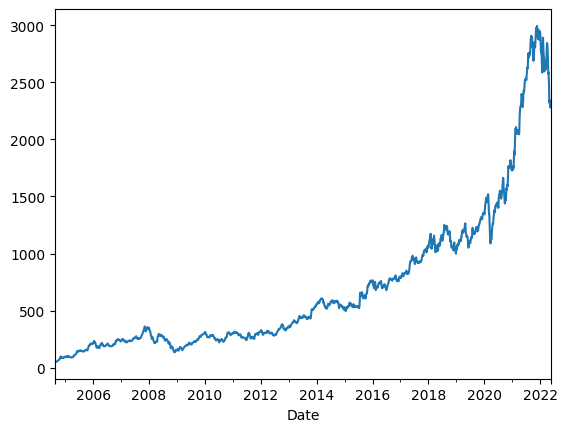

In [128]:
#Rolling Window 
google['Open'].rolling('7D').mean().plot()

In [130]:
google.Close.shift(-1)

Date
2004-08-19      53.952770
2004-08-20      54.495735
2004-08-23      52.239197
2004-08-24      52.802086
2004-08-25      53.753517
                 ...     
2022-05-16    2334.030029
2022-05-17    2248.020020
2022-05-18    2214.909912
2022-05-19    2186.260010
2022-05-20            NaN
Freq: B, Name: Close, Length: 4632, dtype: float64